In [105]:
#learning about algorithmic trading and more general python practice
#https://www.freecodecamp.org/news/algorithmic-trading-in-python/

#very little practice with time series data, this will help

In [106]:
#import required packages
#remember to install quandl package(pip install quandl in powershell)
import pandas as pd
import quandl as q

In [107]:
# set the API key
q.ApiConfig.api_key = "<KEY>"

In [108]:
#send a get request to query Microsoft's end of day stock prices from 1st #Jan, 2010 to 1st Jan, 2019
msft_data = q.get("EOD/MSFT", start_date="2010-01-01", end_date="2019-01-01")

In [109]:
#look at the first 5 rows of data
msft_data.head()

#seems like some data has gone missing since tutorial was first made
#remember no trading on weekends

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,31.7500,32.07,31.29,31.880,154507000.0,0.0,1.0,27.167189,27.441000,26.773585,27.278424,154507000.0
2013-09-04,31.3900,31.47,31.11,31.195,142320600.0,0.0,1.0,26.859151,26.927604,26.619567,26.692298,142320600.0
2013-09-05,31.1000,31.44,30.95,31.235,71644900.0,0.0,1.0,26.611010,26.901934,26.482661,26.726524,71644900.0
2013-09-06,31.3100,31.39,31.13,31.152,75434900.0,0.0,1.0,26.790699,26.859151,26.636680,26.655504,75434900.0
2013-09-09,31.2208,31.79,31.20,31.655,49628500.0,0.0,1.0,26.714374,27.201415,26.696576,27.085901,49628500.0


In [110]:
msft_data.info()

#confirms that data is only from 2013 to 2017 - probably because i'm free tier :)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


In [111]:
msft_data.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,52.584746,52.995410,52.178964,52.617352,3.185689e+07,0.005303,1.0,48.000145,48.373460,47.631076,48.029791,3.185689e+07
std,12.834439,12.866606,12.784332,12.832792,1.709372e+07,0.042538,0.0,13.269137,13.309748,13.212496,13.268630,1.709372e+07
min,31.100000,31.390000,30.950000,31.152000,7.425603e+06,0.000000,1.0,26.611010,26.859151,26.482661,26.655504,7.425603e+06
25%,42.955000,43.265000,42.612500,43.058750,2.185425e+07,0.000000,1.0,38.023338,38.486680,37.651065,38.176974,2.185425e+07
50%,49.535000,50.105000,49.120000,49.690000,2.808245e+07,0.000000,1.0,45.260271,45.776061,44.789975,45.417044,2.808245e+07
75%,60.640000,61.130000,60.241250,60.637500,3.624615e+07,0.000000,1.0,56.495478,57.021552,56.279662,56.636998,3.624615e+07
max,87.120000,87.499900,86.230000,86.850000,2.025224e+08,0.420000,1.0,83.238068,83.601040,82.387725,82.980099,2.025224e+08


In [112]:
#look at monthly averages
msft_data.resample('M').mean()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-30,32.491545,32.778450,32.238500,32.523450,6.214808e+07,0.000000,1.0,27.801699,28.047192,27.585178,27.828999,6.214808e+07
2013-10-31,34.355222,34.631517,34.108000,34.381957,4.197093e+07,0.000000,1.0,29.396371,29.632786,29.184834,29.419247,4.197093e+07
2013-11-30,37.227245,37.557500,37.042750,37.362100,4.002158e+07,0.014000,1.0,31.951468,32.234737,31.793259,32.066892,4.002158e+07
2013-12-31,37.508100,37.769286,37.110810,37.455238,3.936275e+07,0.000000,1.0,32.338755,32.563944,31.996219,32.293179,3.936275e+07
2014-01-31,36.427381,36.689048,35.942857,36.350000,4.429649e+07,0.000000,1.0,31.406980,31.632584,30.989233,31.340264,4.429649e+07
2014-02-28,37.230005,37.549947,36.962895,37.241842,3.712129e+07,0.014737,1.0,32.213981,32.490846,31.983118,32.224479,3.712129e+07
2014-03-31,38.931476,39.363043,38.593433,38.985238,3.706789e+07,0.000000,1.0,33.817124,34.191997,33.523489,33.863823,3.706789e+07
2014-04-30,40.213333,40.526190,39.793090,40.134238,3.552921e+07,0.000000,1.0,34.930586,35.202344,34.565550,34.861881,3.552921e+07
2014-05-31,39.901433,40.131424,39.587614,39.920238,2.735061e+07,0.013333,1.0,34.808867,35.009521,34.535200,34.825442,2.735061e+07


In [113]:
import numpy as np

In [114]:
# assign `Adj Close` to `daily_close`
daily_close = msft_data[['Adj_Close']]

In [115]:
#get the percentage daily change
daily_return = daily_close.pct_change()

#pct change formula
# return = (x(t) - x(t-1))/x(t-1)

In [116]:
#replace N/A values with 0
daily_return.fillna(0, inplace=True)

In [117]:
print(daily_return)

            Adj_Close
Date                 
2013-09-03   0.000000
2013-09-04  -0.021487
2013-09-05   0.001282
2013-09-06  -0.002657
2013-09-09   0.016147
...               ...
2017-12-21  -0.000234
2017-12-22   0.000117
2017-12-26  -0.001286
2017-12-27   0.003630
2017-12-28   0.000117

[1090 rows x 1 columns]


In [118]:
#calculate monthly returns
mdata = msft_data.resample('M').apply(lambda x: x[-1])
monthly_return = mdata.pct_change()

In [119]:
print(monthly_return)

                Open      High       Low     Close    Volume  Dividend  Split  \
Date                                                                            
2013-09-30       NaN       NaN       NaN       NaN       NaN       NaN    NaN   
2013-10-31  0.080606  0.071450  0.080734  0.063852  0.046256       NaN    0.0   
2013-11-30  0.060572  0.072850  0.070175  0.076967 -0.470029       NaN    0.0   
2013-12-31 -0.011105 -0.018543 -0.015944 -0.018883 -0.207642       NaN    0.0   
2014-01-31 -0.012032  0.008249 -0.017653  0.011494  4.322496       NaN    0.0   
2014-02-28  0.027876  0.015044  0.034464  0.012421 -0.557600       NaN    0.0   
2014-03-31  0.064508  0.079043  0.068218  0.069956  0.137603       NaN    0.0   
2014-04-30 -0.000742 -0.024096 -0.005696 -0.014394 -0.243730       NaN    0.0   
2014-05-31  0.001238  0.011605  0.001994  0.013366 -0.025131       NaN    0.0   
2014-06-30  0.042522  0.030266  0.036025  0.018564 -0.108833       NaN    0.0   
2014-07-31  0.028693  0.0350

In [120]:
adj_prices = msft_data['Adj_Close']

In [121]:
#calculate moving average
mav = adj_prices.rolling(window=50).mean()

In [122]:
print(mav[-10:])

Date
2017-12-14    77.861751
2017-12-15    78.076966
2017-12-18    78.282629
2017-12-19    78.472269
2017-12-20    78.655985
2017-12-21    78.836847
2017-12-22    79.004592
2017-12-26    79.163199
2017-12-27    79.324689
2017-12-28    79.487510
Name: Adj_Close, dtype: float64


In [123]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

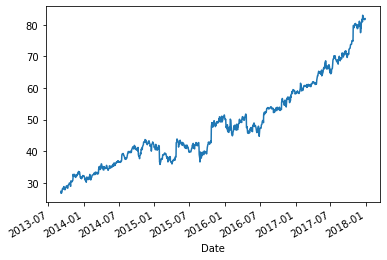

In [124]:
adj_prices.plot()

<AxesSubplot:xlabel='Date'>

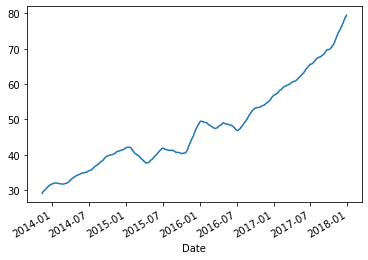

In [125]:
mav.plot()

In [126]:
# step1: initialize the short and long lookback periods

short_lb = 50
long_lb = 120

In [127]:
# step2: initialize a new DataFrame called signal_df with a signal column

signal_df = pd.DataFrame(index=msft_data.index)
signal_df['signal'] = 0.0

In [128]:
signal_df.head()

,signal
Date,
2013-09-03,0.0
2013-09-04,0.0
2013-09-05,0.0
2013-09-06,0.0
2013-09-09,0.0


In [129]:
# step3: create a short simple moving average over the short lookback period
signal_df['short_mav'] = msft_data['Adj_Close'].rolling(window=short_lb, min_periods=1, center=False).mean()
# step4: create long simple moving average over the long lookback period
signal_df['long_mav'] = msft_data['Adj_Close'].rolling(window=long_lb, min_periods=1, center=False).mean()

In [130]:
# step5: generate the signals based on the conditional statement
signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0) 

In [131]:
# step6: create the trading orders based on the positions column
signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == 1.0]

,signal,short_mav,long_mav,positions
Date,,,,
2013-11-12,1.0,29.193202,29.155657,1.0
2015-05-28,1.0,39.911557,39.826827,1.0
2015-11-03,1.0,41.713660,41.552201,1.0
2016-04-21,1.0,48.913938,48.842633,1.0
2016-07-29,1.0,48.243478,48.225426,1.0


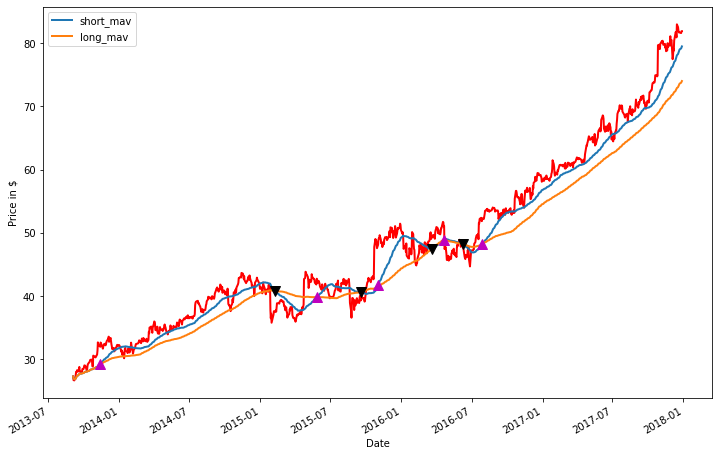

In [150]:
# initialize the plot using plt
fig = plt.figure()
# Add a subplot and label for y-axis
plt1 = fig.add_subplot(111,  ylabel='Price in $')
msft_data['Adj_Close'].plot(ax=plt1, color='r', lw=2.)
# plot the short and long lookback moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))
# plotting the sell signals

plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,
          signal_df.short_mav[signal_df.positions == -1.0],'v',
          markersize=10, color='k')
# plotting the buy signals

plt1.plot(signal_df.loc[signal_df.positions == 1.0].index,
          signal_df.short_mav[signal_df.positions == 1.0],
          '^', markersize=10, color='m')
# Show the plot
plt.show()